In [1]:
# Importing required libraries
import requests
import pandas as pd
import pickle
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

from pmdarima.arima import auto_arima
import statsmodels.graphics.tsaplots as tsaplot
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data

df = pd.read_pickle('data/final_dataframe.pkl')

#convert the date column to datetime formate
#df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

df.head(10)

,Date,Photovoltaics [MWh] Original resolutions,Photovoltaics [MW] Calculated resolutions,Total (grid load) [MWh] Original resolutions,Germany/Luxembourg [€/MWh] Calculated resolutions,normalisation_factor,Solar_generation_MWh_normalized
0,2018-10-01 00:00:00,0.0,42805.0,10589.75,59.53,0.684015,0.0
1,2018-10-01 00:15:00,0.0,42805.0,10589.75,59.53,0.684015,0.0
2,2018-10-01 00:30:00,0.0,42805.0,10589.75,59.53,0.684015,0.0
3,2018-10-01 00:45:00,0.0,42805.0,10589.75,59.53,0.684015,0.0
4,2018-10-01 01:00:00,0.0,42805.0,10589.75,56.10,0.684015,0.0
5,2018-10-01 01:15:00,0.0,42805.0,10560.25,56.10,0.684015,0.0
6,2018-10-01 01:30:00,0.0,42805.0,10507.00,56.10,0.684015,0.0
7,2018-10-01 01:45:00,0.0,42805.0,10407.50,56.10,0.684015,0.0
8,2018-10-01 02:00:00,0.0,42805.0,10263.50,51.41,0.684015,0.0
9,2018-10-01 02:15:00,0.0,42805.0,10274.00,51.41,0.684015,0.0


In [3]:
print(df.shape)
df.isnull().sum()

(163680, 7)


Date                                                 0
Photovoltaics [MWh] Original resolutions             0
Photovoltaics [MW] Calculated resolutions            0
Total (grid load) [MWh] Original resolutions         0
Germany/Luxembourg [€/MWh] Calculated resolutions    0
normalisation_factor                                 0
Solar_generation_MWh_normalized                      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163680 entries, 0 to 163679
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   Date                                               163680 non-null  datetime64[ns]
 1   Photovoltaics [MWh] Original resolutions           163680 non-null  float64       
 2   Photovoltaics [MW] Calculated resolutions          163680 non-null  float64       
 3   Total (grid load) [MWh] Original resolutions       163680 non-null  float64       
 4   Germany/Luxembourg [€/MWh] Calculated resolutions  163680 non-null  float64       
 5   normalisation_factor                               163680 non-null  float64       
 6   Solar_generation_MWh_normalized                    163680 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 8.7 MB


## EDA

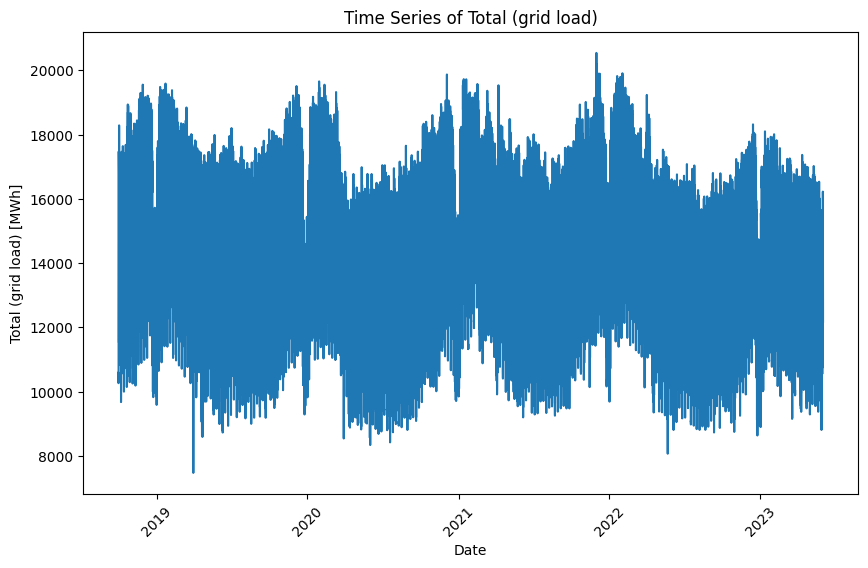

In [5]:

#visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total (grid load) [MWh] Original resolutions'])
plt.xlabel('Date')
plt.ylabel('Total (grid load) [MWh]')
plt.title('Time Series of Total (grid load)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [8]:
# Set the 'Date' column as the index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#decompose the time series
decomposition = seasonal_decompose(df['Total (grid load) [MWh] Original resolutions'], model='additive', extrapolate_trend='freq', period=35064)
#plot the decomposed components

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10, 8))
plt.subplot(415)
plt.plot(df['Date'], df['Total (grid load) [MWh] Original resolutions'], label='Original')
plt.xlabel('Date')
plt.ylabel('df.index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

<Figure size 1000x800 with 0 Axes>

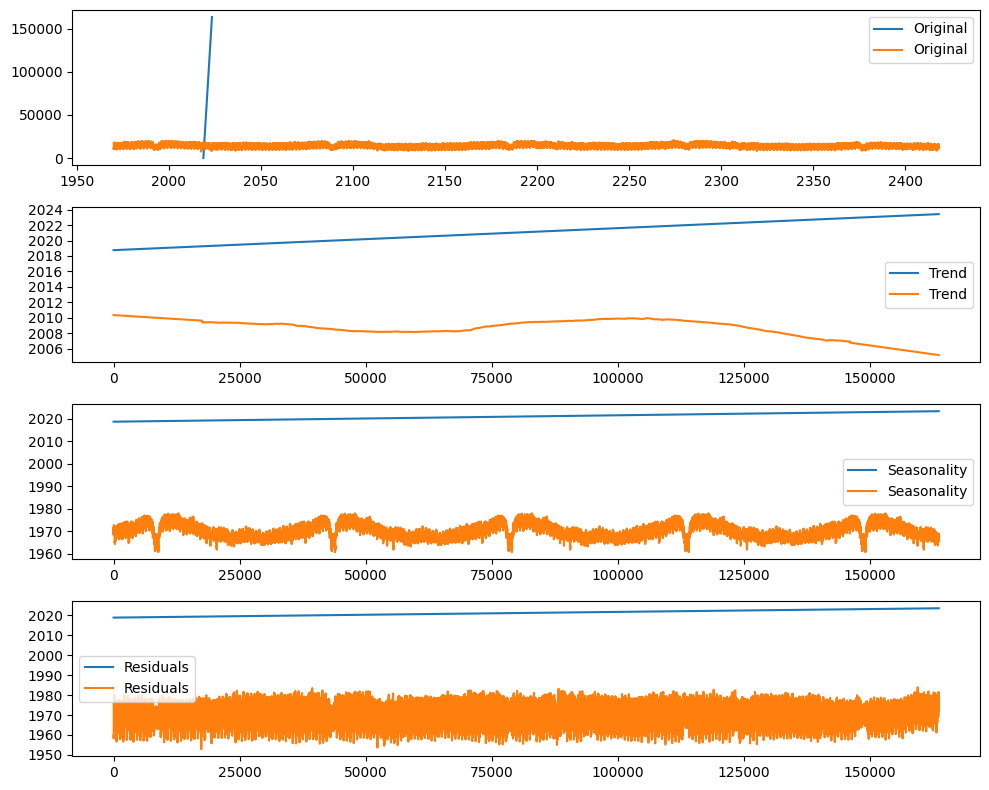

In [6]:
# Set the 'Date' column as the index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#decompose the time series
decomposition = seasonal_decompose(df['Total (grid load) [MWh] Original resolutions'], model='additive', extrapolate_trend='freq', period=35064)

#plot the decomposed components

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df.index, df['Date'], df['Total (grid load) [MWh] Original resolutions'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, df['Date'], trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, df['Date'], seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, df['Date'], residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Checking for stationarity

In order to apply an ARIMA model on the data we have to check of the time series  is stationary. If not, we have to make it stationary.

To check for stationarity we will need to apply three different methods.
1. Calculate and plot the rolling mean and rolling standard deviation. If they show an upward or downward trend or vary over time, then it is highly likely that our time series is non-stationary.
2. Use of ADF and the KPSS test.
3. The null-hypothesis of the ADF test is that the time series is non-stationary whereas the KPSS test assumes that it is stationary.

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -11.909629
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 4.554494
p-value: 0.010000
----------------------------------------


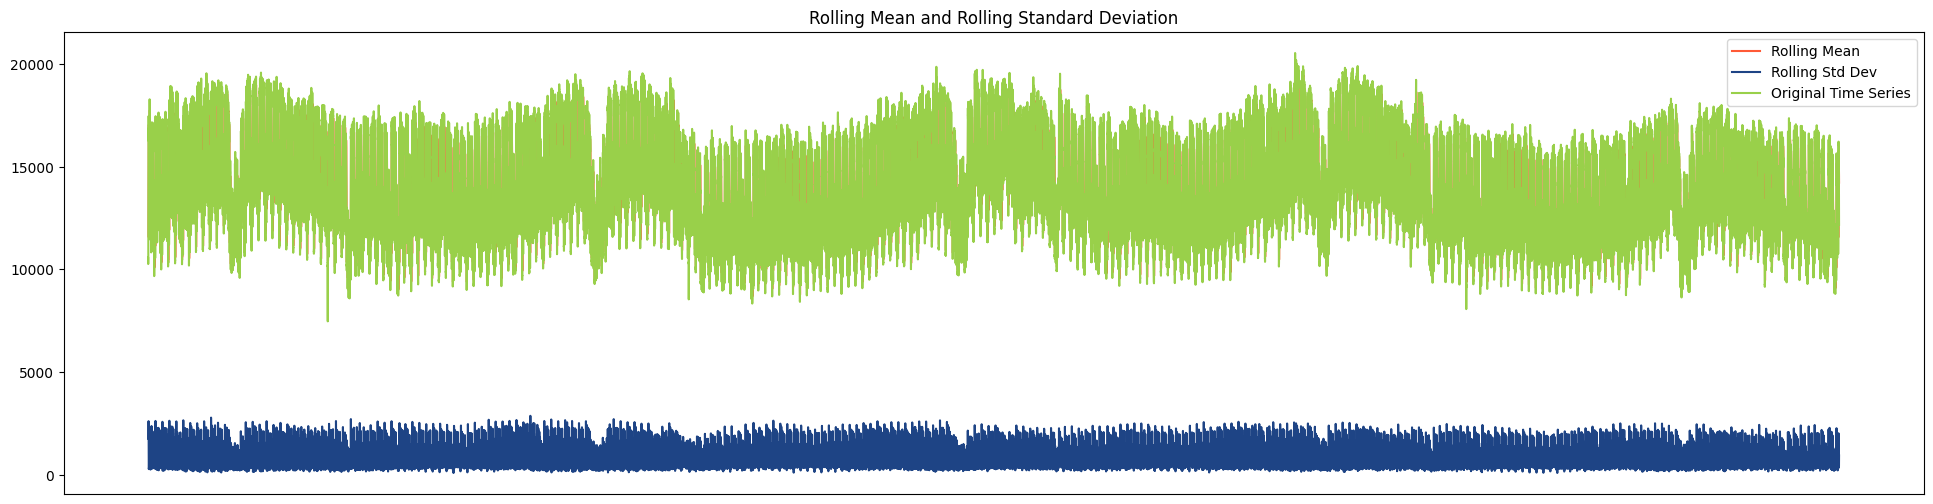

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss
# Rename the column
df.rename(columns={'Total (grid load) [MWh] Original resolutions': 'original_consumption'}, inplace=True)

# Test for stationarity
def stationarity_test(original_consumption):
    # Calculating rolling mean and rolling standard deviation
    rolling_mean = original_consumption.rolling(30).mean()
    rolling_std_dev = original_consumption.rolling(30).std()

    # Plot the statistics
    plt.figure(figsize=(24, 6))
    plt.plot(rolling_mean, color='#FF5A36', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='#1E4485', label='Rolling Std Dev')
    plt.plot(original_consumption, color='#99D04A', label='Original Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling Standard Deviation')

    # Return the rolling mean and rolling standard deviation
    return rolling_mean, rolling_std_dev

# Call the function with your renamed consumption data
rolling_mean, rolling_std_dev = stationarity_test(df['original_consumption'])

# ADF test
print("ADF Test:")
adf_test = adfuller(df['original_consumption'], autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('----'*10)

# KPSS test
print("KPSS Test:")
kpss_test = kpss(df['original_consumption'], regression='c', nlags="legacy", store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('----'*10)

#stationarity_test(df['original_consumption'])



The rolling mean moves up and down over time. The p-value of the ADF test is > 0.05 which tells us that we cannot decline the null-hypothesis that the time series is non-stationary. On the other hand the p-value for the KPSS test is below 0.05 which means we can reject this null-hypothesis. All three tests lead to the result that this time series is not stationary.  

## De-trend the Time Series 

In [13]:
#De-trending the time series
df['original_consumption_Detrend'] = (df['original_consumption'] - df['original_consumption'].shift(30))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -33.574312
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.000786
p-value: 0.100000
----------------------------------------


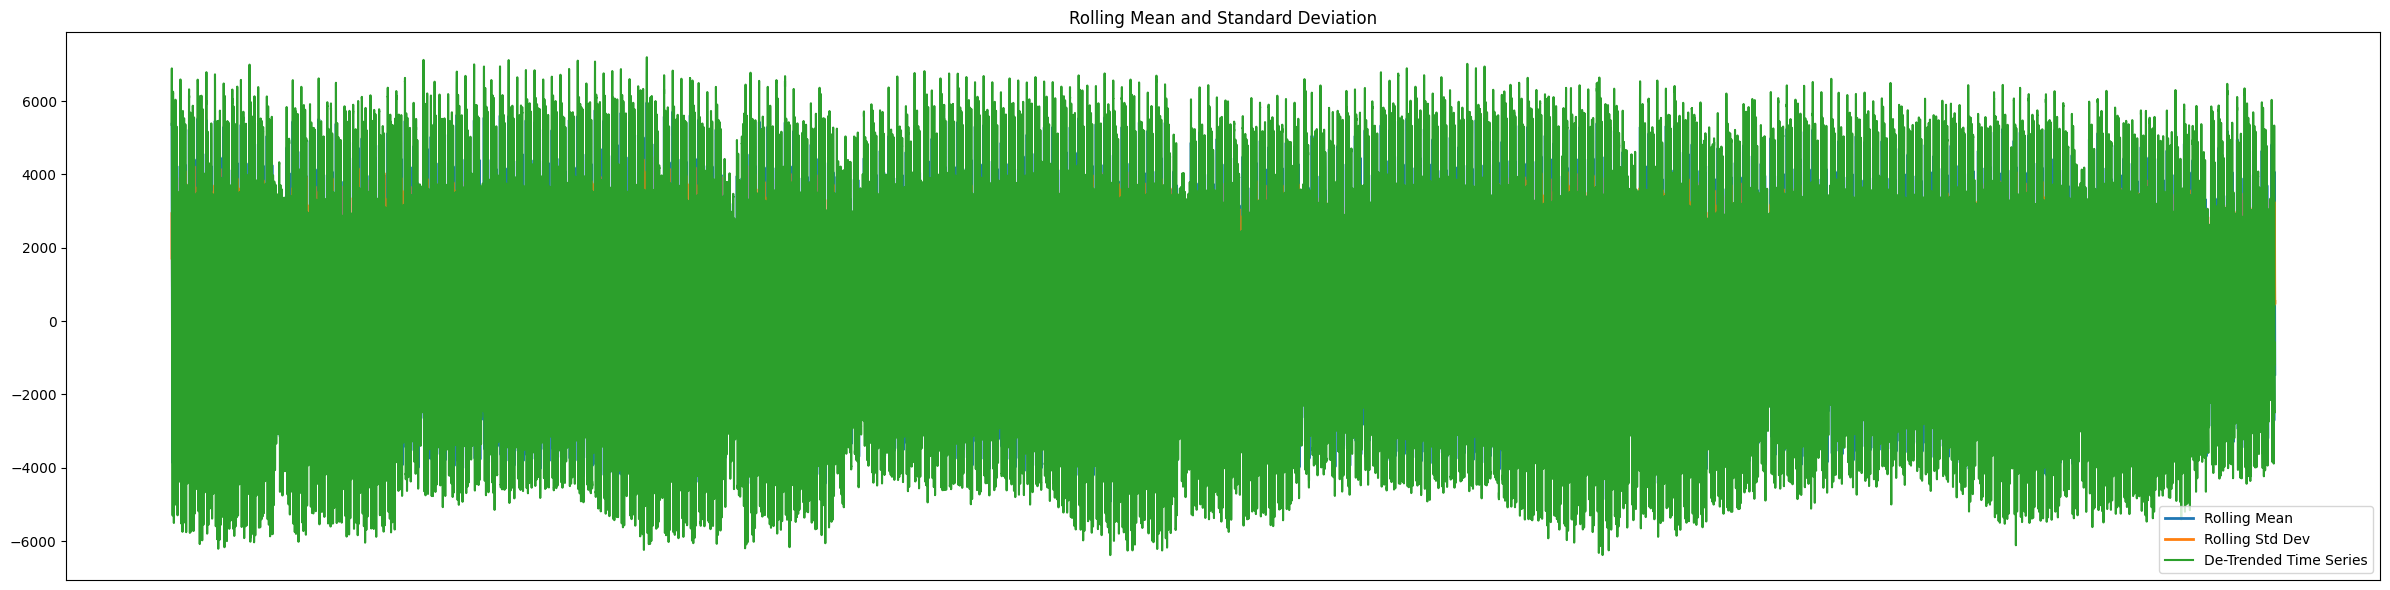

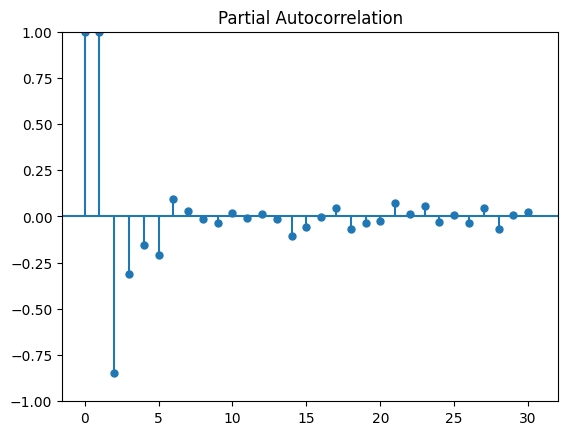

In [14]:
#test for stationarity after de-trending
def stationarity_test(original_consumption):
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = original_consumption.rolling(30).mean()
    rolling_std_dev = original_consumption.rolling(30).std()
  
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(original_consumption,label='De-Trended Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(original_consumption,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(original_consumption, regression='c', nlags='legacy', store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df['original_consumption_Detrend'].dropna())

# Partial Autocorrelation Plot
pacf = plot_pacf(df['original_consumption_Detrend'].dropna(), lags=30)

After de-trending the time series the AFD test as well as th eKPSS test both indicate that our series is now stationary. Having a look at the partial autocorrelation plot suggests that correlation exists at certain lags.

## Split the Data

Training set shape: (130944,)
Test set shape: (32736,)


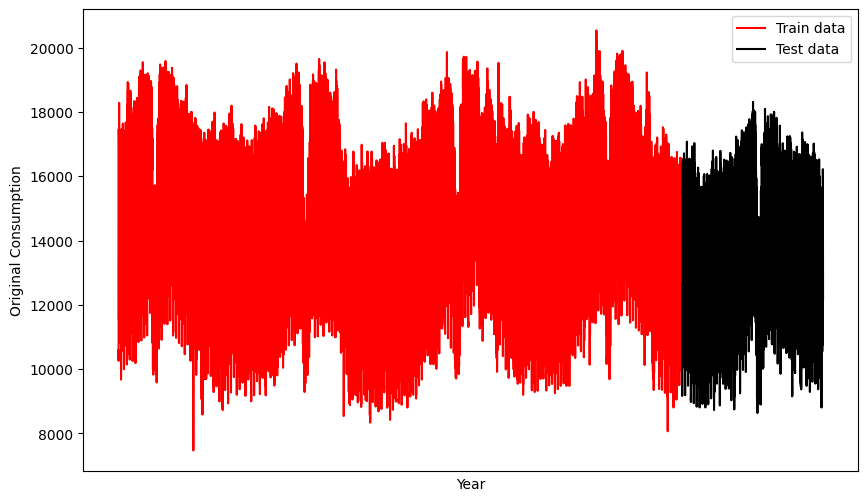

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the train-test split ratio
df_arima = df['original_consumption']
train_test_split_ratio = 0.8  # 80% for training, 20% for testing

# Split the data into training and test sets
train_data, test_data = train_test_split(df_arima, train_size=train_test_split_ratio, shuffle=False)

# Print the shapes of the resulting sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

# Plotting the train and test set
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Original Consumption')
plt.xticks([])
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend();


## Model Building

After splitting the data we can now try to forecast the energy consumption. We can use smoothing methods and ARIMA methods. While smoothing methods can be used for non-stationray data, ARIMA requires the data to be stationary. `auto_arima` can help us to make the series stationary and determine the optimal order for the ARIMA model.

We will perform multiple fits for each model to find the best hyperparamters. 

## Simple Exponential Smoothing

Simple Exponential Smoothing (SES) is used when the data doesn't contain any trend or seasonality. Smoothing Factor for level ($\alpha$) provides weightage to the influence of the observations. With larger values of $\alpha$ more attention is given to the most recent past observations whereas smaller values indicate that more past observations are being considered for forecasting. 

Simple Exponential Smoothing RMS: 3728.24 & Smoothing Level: 0.5


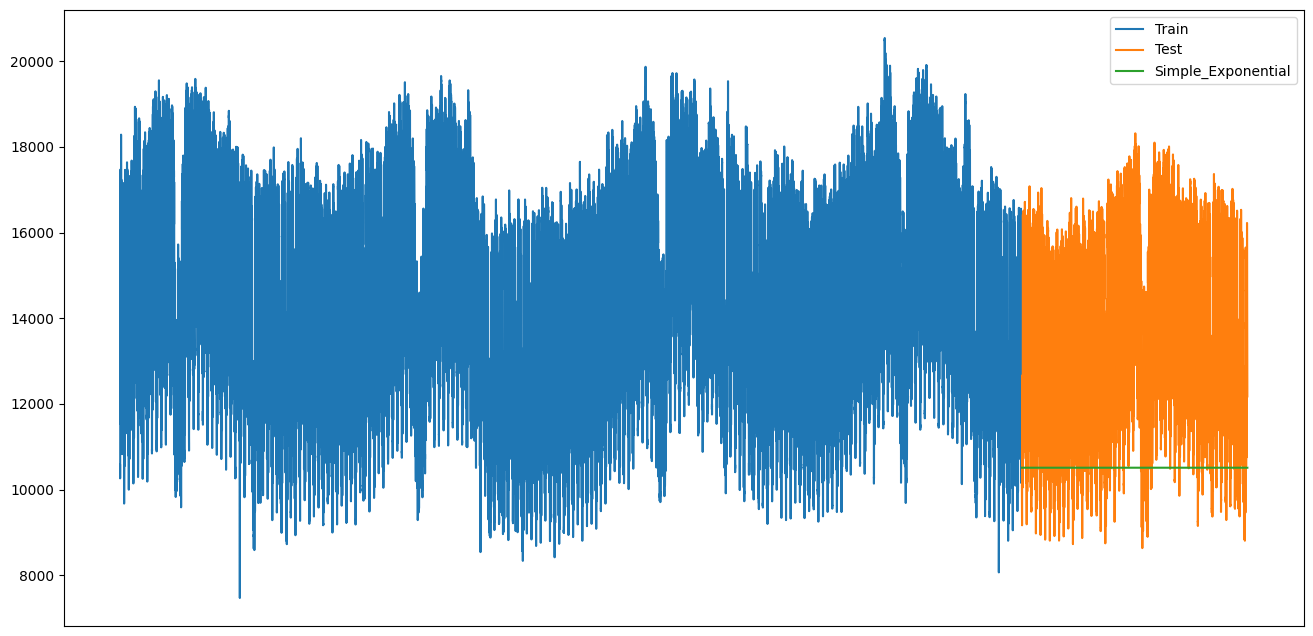

In [26]:
from itertools import permutations
#simple exponential smoothing method
pred_values = test_data.copy()
pred_values = pd.DataFrame(pred_values)

# Create an empty DataFrame to store the RMS and Smoothing Level values
simple_exponential_df = pd.DataFrame(columns=['RMS', 'Smoothing Level'])

# Generate permutations of the smoothing level values
perm = permutations(list(np.linspace(0.5, 1, num=20)), 1)

for i in list(perm):
    # Fit the SimpleExponentialSmoothing model on the training data
    fit_sim_exp = SimpleExpSmoothing(train_data).fit(smoothing_level=i[0])
    
    # Forecast values for the test data
    pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))
    
    # Calculate the RMS value
    rms = sqrt(mean_squared_error(test_data.values, pred_values['Simple_Exponential']))
    
    # Create a temporary DataFrame for the current iteration
    temp_df = pd.DataFrame({'RMS': [rms], 'Smoothing Level': [i[0]]})
    
    # Concatenate the temporary DataFrame to the main DataFrame
    simple_exponential_df = pd.concat([simple_exponential_df, temp_df], ignore_index=True)

# Get the row index of the minimum RMS value
min_rms_index = simple_exponential_df['RMS'].idxmin()

# Get the optimal smoothing level value with the minimum RMS
opt_smoothing_level = simple_exponential_df.loc[min_rms_index, 'Smoothing Level']

# Fit the SimpleExponentialSmoothing model on the training data with the optimal smoothing level
fit_sim_exp = SimpleExpSmoothing(train_data).fit(smoothing_level=opt_smoothing_level)
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

# Plot the actual, predicted, and test data
plt.figure(figsize=(16, 8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.xticks([])
plt.legend(loc='best')

# Calculate and print the RMS value and the optimal smoothing level
rms_sim_exp = sqrt(mean_squared_error(test_data.values, pred_values['Simple_Exponential']))
print("Simple Exponential Smoothing RMS: " + str(round(rms_sim_exp, 3)) + " & Smoothing Level: " + str(round(opt_smoothing_level, 3)))

# Save the plot
plt.savefig("Consumption_Simple_Exponential.png", dpi=300)

## Holt's Exponential Smoothing

Holt’s Exponential Smoothing RMS: 153528.989 & Smoothing Level: 0.05 & Smoothing Slope: 0.3


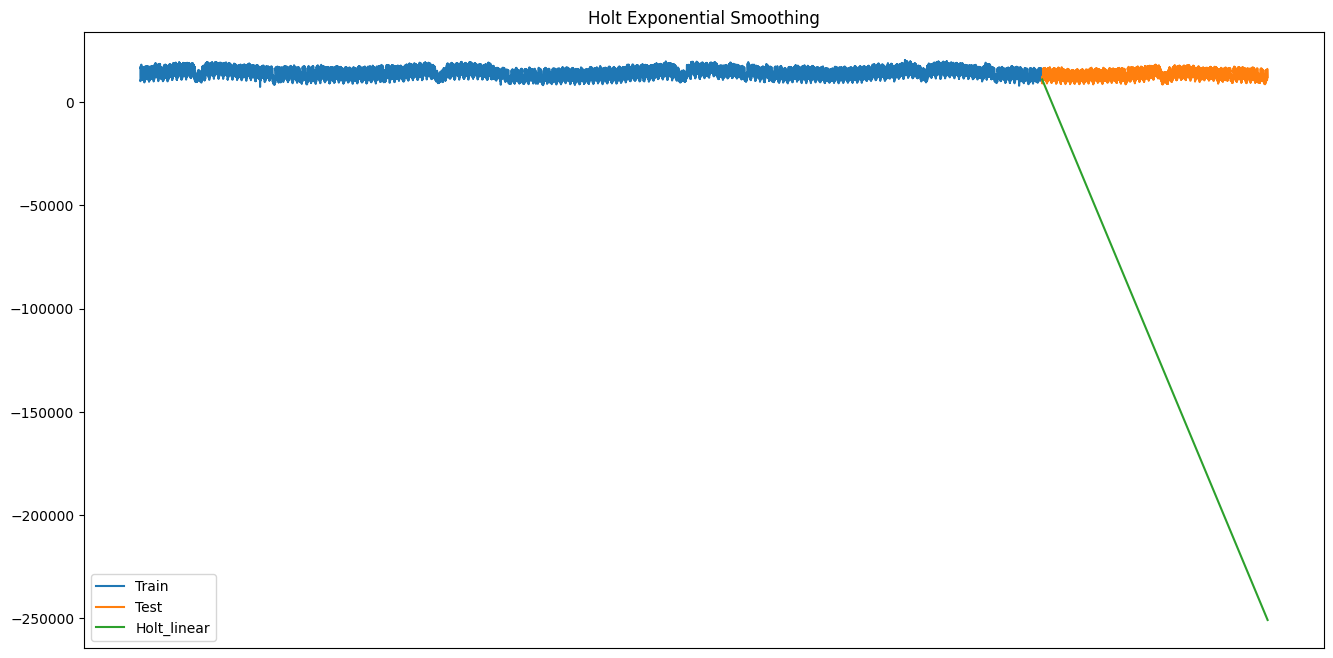

In [28]:
# Holt's Exponential Smoothing Method
# Create an empty DataFrame to store the RMS, Smoothing Level, and Smoothing Slope values
holt_linear_df = pd.DataFrame(columns=['RMS', 'Smoothing Level', 'Smoothing Slope'])

# Generate permutations of the smoothing level and smoothing slope values
perm = permutations(list(np.linspace(0.05, 1, num=20)), 2)

for i in list(perm):
    # Fit the Holt's Exponential Smoothing model on the training data
    fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level=i[0], smoothing_slope=i[1])
    
    # Forecast values for the test data
    pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))
    
    # Calculate the RMS value
    rms = round(sqrt(mean_squared_error(test_data.values, pred_values['Holt_linear'])), 3)
    
    # Create a temporary DataFrame for the current iteration
    temp_df = pd.DataFrame({'RMS': [rms], 'Smoothing Level': [i[0]], 'Smoothing Slope': [i[1]]})
    
    # Concatenate the temporary DataFrame to the main DataFrame
    holt_linear_df = pd.concat([holt_linear_df, temp_df], ignore_index=True)

# Get the row index of the minimum RMS value
min_rms_index = holt_linear_df['RMS'].idxmin()

# Get the optimal smoothing level and smoothing slope values with the minimum RMS
opt_smoothing_level = holt_linear_df.loc[min_rms_index, 'Smoothing Level']
opt_smoothing_slope = holt_linear_df.loc[min_rms_index, 'Smoothing Slope']

# Fit the Holt's Exponential Smoothing model on the training data with the optimal values
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level=opt_smoothing_level, smoothing_slope=opt_smoothing_slope)
pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

# Plot the actual, predicted, and test data
plt.figure(figsize=(16, 8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.xticks([])
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.savefig("Consumption_Holt_winters.png", dpi=300)

# Calculate and print the RMS value, optimal smoothing level, and optimal smoothing slope
rms_holt_exp = sqrt(mean_squared_error(test_data.values, pred_values['Holt_linear']))
print("Holt’s Exponential Smoothing RMS: " + str(round(rms_holt_exp, 3)) + " & Smoothing Level: " + str(round(opt_smoothing_level, 3)) + " & Smoothing Slope: " + str(round(opt_smoothing_slope, 3)))

## Auto Regressive Integrated Moving Average (ARIMA)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1655843.972, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2882191.429, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=4.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1571502.042, Time=4.81 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1571477.036, Time=10.45 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1571348.344, Time=13.73 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=2.20 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=30.53 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=28.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=20.39 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1571978.940, Tim

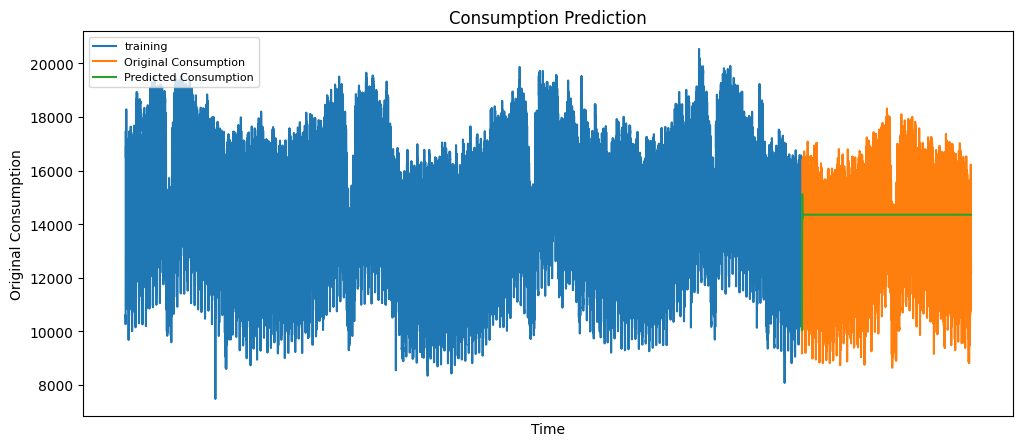

In [34]:
# Auto ARIMA Method
arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      max_dur=10,
                      seasonal = False
                      )

# Fit the final model with the order
fitted_model = arima_model.fit(train_data) 
print(fitted_model.summary())

# Forecasting values
forecast_values = fitted_model.predict(len(test_data), alpha=0.05) 
fcv_series = pd.Series(forecast_values, index=test_data.index)

# Plot the predicted consumption and original consumption
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='Original Consumption')
plt.plot(fcv_series,label='Predicted Consumption')
plt.title('Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Original Consumption')
plt.xticks([])
plt.legend(loc='upper left', fontsize=8)
#plt.show()

# Evaluate the model by calculating RMSE
rms_auto_arima = sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

plt.savefig("Consumption_ARIMA.png", dpi=300)

Auto-Arima RMSE: 2363.563


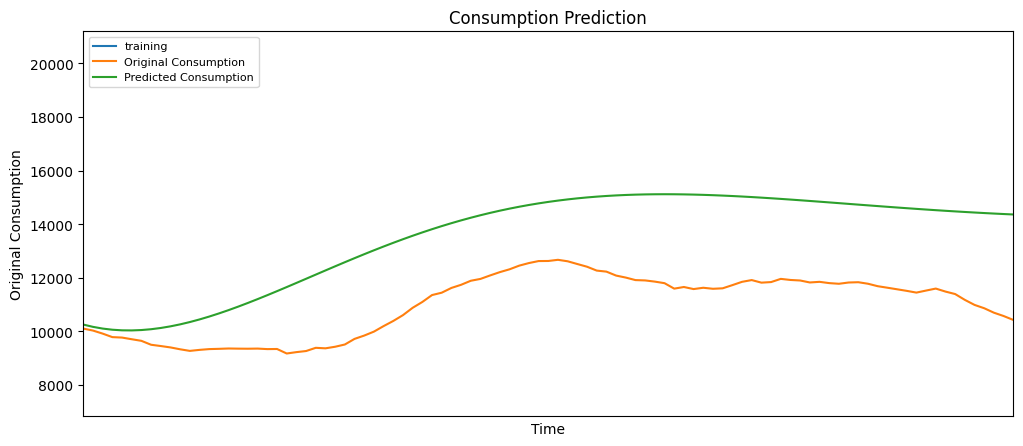

In [41]:
# Forecasting values
forecast_values = fitted_model.predict(len(test_data), alpha=0.05)
fcv_series = pd.Series(forecast_values, index=test_data.index)

# Plot the predicted consumption and original consumption
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='Original Consumption')
plt.plot(fcv_series, label='Predicted Consumption')
plt.title('Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Original Consumption')
plt.xticks([])
plt.legend(loc='upper left', fontsize=8)
plt.savefig("Consumption_ARIMA.png", dpi=300)
plt.xlim(left=130944, right=131040)


# Evaluate the model by calculating RMSE
rms_auto_arima = sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE: " + str(round(rms_auto_arima, 3)))


In [37]:
test_data

130944    10098.25
130945    10025.00
130946     9911.00
130947     9780.00
130948     9763.25
            ...   
163675    12945.50
163676    12817.75
163677    12539.00
163678    12371.00
163679    12176.75
Name: original_consumption, Length: 32736, dtype: float64

## Evaluation of the Models

To evaluate the performance of the model, we will use Root Mean Squared Error (RMSE) and compare which model performed the best.

In [36]:
# Printing RMSE of all the methods
print("RMSE of all the methods")
print("Auto-Arima: ", round(rms_auto_arima,3))
print("Simple Exponential Smoothing: ", round(rms_sim_exp,3))
print("Holt' Exponential Smoothing: ", round(rms_holt_exp,3))

RMSE of all the methods
Auto-Arima:  2363.563
Simple Exponential Smoothing:  3728.24
Holt’s Exponential Smoothing:  153528.989


From the three models we trained the Auto-Arima reached the smallest RMSE. 